In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d
import random as rn

# Task A

In [9]:
def func(x):
    y = x**2 + (x-2)**3 - 4
    return y

In [10]:
def mybisection(a,b,eps):
    # repeat the split of teh interval until the bracketing intervla becomes smaller than the accuracy
    while abs(a-b)>eps:
        # calculate the mid point
        xm = (a + b) / 2
        # establish in which subinterval the solution lies
        # compute f(a) * f(xm)
        ff = func(a) * func(xm)
        if ff < 0: 
            # the solution lies in the left interval
            # set the upper bracket as xm
            b = xm
        else:
            # the solution lies in the right interval
            # set the lower bracket as xm
            a = xm
            
    # the true solution is bracketed within the latest interval [a,b]
    # we can approximate it with the midpoint
    sol = (a + b) / 2
    
    return sol

2.000274658203125


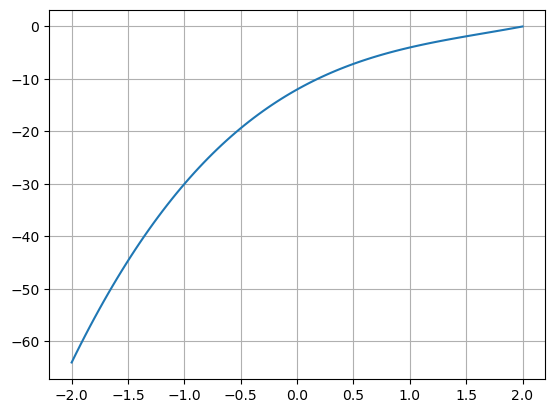

In [11]:
x = np.linspace(-2,2,100)
y = x**2 + (x-2)**3 - 4
pl.plot(x,y)
pl.grid()


sol = mybisection(-5,8,0.001)
print(sol)

# Task B

In [12]:
# Newton-Raphson method
def myNewton(x0,eps):
    # set a dx step
    dx = 0.1
    # set initial guess as solution
    xn = x0
    # set the error large enough, to enter the loop once
    err = 10*eps
    # repeat while the error is too large
    while err>eps:
        # set the current solution as old solution
        xp = xn
        # evaluate the function at xn and xn+dx
        fxn = func(xn)
        fxndx = func(xn+dx)
        # compute derivative
        dfxn = (fxndx - fxn)/ dx
        # apply NR method
        xn = xp - fxn/dfxn
        # assess the error
        err = abs(xn-xp)
    return xn

In [13]:
sol = myNewton(1,0.01)
print(sol)

2.000063398781181


# Task C

In [14]:
# set of functions of the system
def sysfuncs(X):
    # X is a one dimensional vector with as many elements as the number of functions, i.e. u, v, etc.
    # define a vector for the output
    UV = np.ndarray(len(X))
    # evaluate all the functions at point X
    # X is a vector long as the number of independent variables, i.e. x, y, etc.
    # alter and write here the various functions
    UV[0] = X[0]**2 + 1 - X[1]
    UV[1] = 2*np.cos(X[0]) - X[1]
    return UV

In [15]:
# this function computes the Jacobian of a set of functions
def Jacobian(X,Dx):
    # establish how many functions/independent variables, aka the size of the Jacobian
    N = len(X)
    # set an empty array N x N
    Jac = np.ndarray((N,N))
    # calculate and fill column by column, i.e. derivative of each function with respect to the same
    # independent variable
    # We will apply the central difference scheme for the derivative:
    # df/dx = (f at successive point - f at previous point) / dx
    for i in range(N):
        # set the successive point for the independend variable in question
        X[i] += Dx[i]
        # evaluate all the functions at this point
        Fplus = sysfuncs(X)
        # set the precedent point for the independend variable in question
        X[i] -= 2*Dx[i]
        # evaluate all the functions at this point
        Fminus = sysfuncs(X)
        # determine the derivatives for the column ith
        Jac[:,i] = (Fplus - Fminus) / (2*Dx[i])
    return Jac

In [16]:
def MatVect(A,b):
    # this function performs matrix-vector multiplication
    N = A.shape[0]
    y = np.zeros(N)
    for i in range(N):
        for k in range(N):
            y[i] += A[i,k] * b[k]
    return y

In [17]:
# solve a set of non linear equations
# set the accuracy requested
eps = 0.001
# set the initial guess
X0 = np.array([0.2, 1.8])

# set dx (of the order of or smaller than eps)
Dx = np.array([0.5*eps, 0.5*eps])
# set initial guess as solution
Xn = X0
# set the error large enough, to enter the loop once
err = 10*eps
# repeat while the error is too large
while err > eps:
    # set the current solution as old solution
    Xp = Xn
    # compute teh Jacobian
    J = Jacobian(Xn,Dx)
    # invert the Jacobian
    Jinv = np.linalg.inv(J)
    # apply Newton's methods
    Xn = Xp - MatVect(Jinv,sysfuncs(Xn))
    # assess the error: consider the maximum error, amongst errors for all variables
    err = np.max(np.abs(Xn-Xp))


print(Xn)

[0.7146209  1.51068328]


# Task D

In [21]:
import numpy as np

# Define the function
def f(x, y):
    return 4 * x * y - 2 * x**2 - 4 * y**2 

# Starting point
x0, y0 = 3, 2

# Number of iterations
num_iterations = 100




# Define the numerical partial derivatives of the function, by using the forward scheme
def df_dx(x, y, h=1e-6):
    return (f(x + h, y) - f(x, y)) / h

def df_dy(x, y, h=1e-6):
    return (f(x, y + h) - f(x, y)) / h

# Define the numerical second partial derivatives (Hessian matrix), by using the forward scheme
def d2f_dx2(x, y, h=1e-6):
    return (df_dx(x + h, y) - df_dx(x, y)) / h

def d2f_dy2(x, y, h=1e-6):
    return (df_dy(x, y + h) - df_dy(x, y)) / h

def d2f_dxdy(x, y, h=1e-6):
    return (df_dy(x + h, y) - df_dy(x, y)) / h


# Optimization loop
for i in range(num_iterations):
    # Compute the gradient at the current point
    grad_x = df_dx(x0, y0)
    grad_y = df_dy(x0, y0)
    
    # Compute the Hessian matrix at the current point
    Hessian = np.array([[d2f_dx2(x0, y0), d2f_dxdy(x0, y0)],
                        [d2f_dxdy(x0, y0), d2f_dy2(x0, y0)]])
    
    # Compute the inverse of the Hessian matrix
    inv_Hessian = np.linalg.inv(Hessian)
    
    # Compute the search direction
    search_direction = np.dot(-inv_Hessian, np.array([grad_x, grad_y]))
    
    # Update the current point using the search direction and a predetermined step size
    alpha = 0.1  # Predetermined step size
    x0 += alpha * search_direction[0]
    y0 += alpha * search_direction[1]

# Print the final point and the maximum value
print("Location of maximum (x, y):", round(x0, 2), round(y0, 2))
print("Maximum value of f(x, y):", round(f(x0, y0), 2))

Location of maximum (x, y): 0.0 0.0
Maximum value of f(x, y): -0.0


# Optional Task

In [20]:
import numpy as np
from scipy.optimize import minimize

def objfunc(x):
    x1 = x[0]
    x2 = x[1]

    return -(1.2*x1 + x1 ** 0.5 + 1.1*x2)

def c1(x):
    return 100 - x[0] - x[1]

def c2(x):
    return 50 - x[0] - x[1]**0.7

constraints = (
    {'type': 'ineq', 'fun': c1 },
    {'type': 'ineq', 'fun': c2}
)

bounds = ((0, None), (0, 20))
x0 = (10, 10)

res = minimize(objfunc, x0, bounds=bounds, constraints=constraints, options={'disp':True})

print(f"First project: {res.x[0]:.3f}k")
print(f"Second project:{res.x[1]:.3f}k")

Optimization terminated successfully    (Exit mode 0)
            Current function value: -78.69961776285409
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 6
First project: 41.858k
Second project:20.000k


In [22]:
# Analytical method

import numpy as np

# Define the function
def f(x, y):
    return 4 * x * y - 2 * x**2 - 4 * y**2 

# Define the partial derivatives of the function
def df_dx(x, y):
    return 4 * y - 4 * x

def df_dy(x, y):
    return 4 * x - 8 * y

# Define the second partial derivatives (Hessian matrix)
def d2f_dx2(x, y):
    return -4

def d2f_dy2(x, y):
    return -8

def d2f_dxdy(x, y):
    return 4

# Starting point
x0, y0 = 3, 2

# Number of iterations
num_iterations = 100

# Optimization loop
for i in range(num_iterations):
    # Compute the gradient at the current point
    grad_x = df_dx(x0, y0)
    grad_y = df_dy(x0, y0)
    
    # Compute the Hessian matrix at the current point
    Hessian = np.array([[d2f_dx2(x0, y0), d2f_dxdy(x0, y0)],
                        [d2f_dxdy(x0, y0), d2f_dy2(x0, y0)]])
    
    # Compute the inverse of the Hessian matrix
    inv_Hessian = np.linalg.inv(Hessian)
    
    # Compute the search direction
    search_direction = np.dot(-inv_Hessian, np.array([grad_x, grad_y]))
    
    # Update the current point using the search direction and a predetermined step size
    alpha = 0.1  # Predetermined step size
    x0 += alpha * search_direction[0]
    y0 += alpha * search_direction[1]

# Print the final point and the maximum value
print("Location of maximum (x, y):", round(x0, 2), round(y0, 2))
print("Maximum value of f(x, y):", round(f(x0, y0), 2))


Location of maximum (x, y): 0.0 0.0
Maximum value of f(x, y): -0.0
